# Q5
### Use only two features: Petal Length and Petal Width, for 3 class classification and draw the decision boundary between them (2 dimension, 3 regions also called as multi-class problem)

In [103]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sympy

In [104]:
df = pd.read_csv("Iris_dataset.csv", header = 0, usecols=[2,3,4])
df.head(10)

,petal.length,petal.width,variety
0,1.4,0.2,Setosa
1,1.4,0.2,Setosa
2,1.3,0.2,Setosa
3,1.5,0.2,Setosa
4,1.4,0.2,Setosa
5,1.7,0.4,Setosa
6,1.4,0.3,Setosa
7,1.5,0.2,Setosa
8,1.4,0.2,Setosa
9,1.5,0.1,Setosa


# Definitions

In [105]:
def discriminant_func(X, priori_prob, mean, cov):
    term_1 = -0.5 * np.dot(np.dot(np.transpose(X-mean), np.linalg.inv(cov)), (X-mean))
    term_2 = np.log(2*np.pi)-0.5*np.log(np.linalg.det(cov))
    term_3 = np.log(priori_prob)
    return (term_1 - term_2 +term_3)[0][0]

def plot_sympyplot_in_mpl(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    backend._process_series(backend.parent._series, ax, backend.parent)
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)

def draw_boundary(i, j, color):
    mat = sympy.Matrix([x1, x2])
    g = discriminant_func(mat, priori_prob[i], mean[class_names[i]].to_numpy().reshape(2,1), \
        cov[class_names[i]]) - discriminant_func(mat, priori_prob[j], \
        mean[class_names[j]].to_numpy().reshape(2,1), cov[class_names[j]] )
    solns = sympy.solve(g, (x1, x2))
    
    print(f"Solution for boundary between {class_names[i]} and {class_names[j]}:\n {solns}\n")
    plt.plot(0, 0, c=color, label=f'boundary between {class_names[i]} and {class_names[j]}')
    return sympy.plot_implicit(g, (x1, 0, 7.5), (x2, 0, 5), show=False, line_color=color)

def plot_graph(class_names):
    fig, ax = plt.subplots(figsize=(12,8))
    boundary = draw_boundary(0, 1, 'red')
    boundary.append(draw_boundary(1, 2, 'orange')[0])
    boundary.append(draw_boundary(0, 2, 'purple')[0])
    plot_sympyplot_in_mpl(boundary, ax)

    color=["red","green","blue"]
    k=0

    for i in class_names:
        ax.scatter(df[df['variety'] == i]['petal.length'], df[df['variety'] == i]['petal.width'], label=i,c=color[k], s=10)
        k+=1

    plt.title(label='Three-class classification', fontsize='30', pad='20')
    #fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
    plt.xlabel("petal.length", size=20)
    plt.ylabel("petal.width", size=20)
    plt.legend(loc='best',fontsize=15)
    plt.show()

# Main

Solution for boundary between Setosa and Versicolor:
 [(-0.0729508940948373*x2 - 1.26655039053319*sqrt(-0.833904867737813*x2**2 - 0.0632622624383462*x2 + 1) + 1.11510452422751, x2), (-0.0729508940948373*x2 + 1.26655039053319*sqrt(-0.833904867737813*x2**2 - 0.0632622624383462*x2 + 1) + 1.11510452422751, x2)]

Solution for boundary between Versicolor and Virginica:
 [(2.4140475008826*x2 - 2.19658914158677*sqrt(-0.111095227530428*x2**2 - 0.447278209927644*x2 + 1) + 0.685033924322149, x2), (2.4140475008826*x2 + 2.19658914158677*sqrt(-0.111095227530428*x2**2 - 0.447278209927644*x2 + 1) + 0.685033924322149, x2)]

Solution for boundary between Setosa and Virginica:
 [(0.535501231261874*x2 - 1.53556561556603*sqrt(-0.968879954698697*x2**2 - 0.0887760962899596*x2 + 1) + 1.00988637406934, x2), (0.535501231261874*x2 + 1.53556561556603*sqrt(-0.968879954698697*x2**2 - 0.0887760962899596*x2 + 1) + 1.00988637406934, x2)]



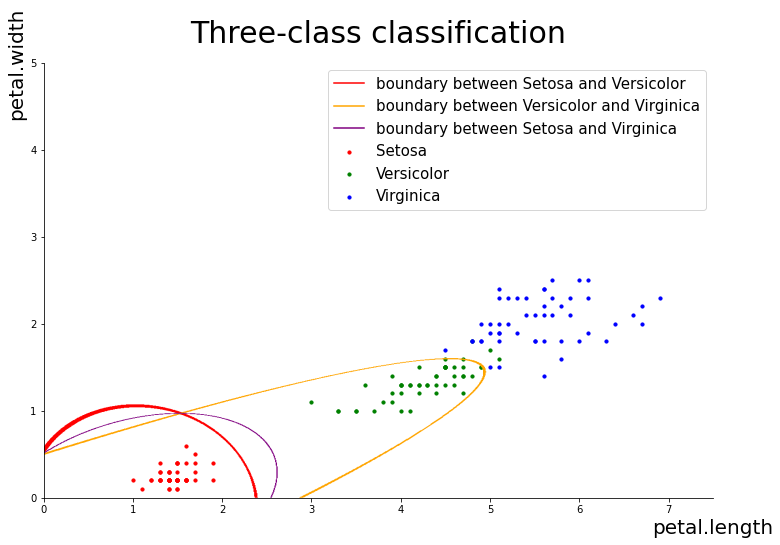

In [106]:
class_names = ['Setosa', 'Versicolor', 'Virginica']
priori_prob = [0.3, 0.3, 0.3]
cov = {}
mean = {}

for i in class_names:
    cov[i] = df[df['variety'] == i].cov()
    mean[i] = df[df['variety'] == i].mean()

x1, x2 = sympy.symbols('x1 x2')
plot_graph(class_names)